# Employee Attrition dataset

* Attriion a big concern which most of the companies face. There are many facors which can cause an employee to leave the current company. It can vary for various reason like - not timely promotion, low or hig salary, difficult relation with immediate boss, not recognition of talent by the company etc. 
* For a company attrition a big cost, as the company invests a lot in employing an employee from joining, training, hitting the production & then timely requisite training. So when an employee resigns the HR need to fill the space of that employee & invest again hat employee resulting to a cost of acquisation. 
* Many companies across the globe work towards fixing this issue & the only way to understand it is studying the past data & understand a trend in predicting the cause of attrition.

This dataset is is a HR dataset sourced from IBM HR Analytics Employee Attrition & Performance which contains employee data for 1,470 employees with various information about the employees.

* information taken from: https://towardsdatascience.com/building-an-employee-churn-model-in-python-to-develop-a-strategic-retention-plan-57d5bd882c2d

* Lets start by importing necessary libraries the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
le = LabelEncoder()
import warnings
warnings.filterwarnings('ignore')

LOAD THE DATASET

In [2]:
hdf = pd.read_csv('hr_employee_attrition.csv')

In [3]:
hdf

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [4]:
hdf.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


In [5]:
hdf.head(50)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


In [6]:
hdf.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

* No null values are present in the dataset, lets check the datatype & other information of the dataset.

In [7]:
hdf['EmployeeCount'].unique()

array([1], dtype=int64)

In [8]:
hdf['StandardHours'].unique()

array([80], dtype=int64)

* The Employee Count & Standard Hours columns are unique columns hence it is safe to be dropped from the dataset. 
* The Employee Numbers are just unique numbers for each employee as they are all irrelavant for analytics dropping thm from the dataset.

In [9]:
hdf_1 = hdf.drop(['EmployeeCount','StandardHours','EmployeeNumber'],axis=1)

In [10]:
hdf_1

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,...,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,...,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,...,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,...,3,4,0,17,3,2,9,6,0,8


In [11]:
hdf_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

The dataset has many columns which are object which needs to be converted to integer columns, 

Object columns: ['Attrition',Business Travel,Department,EducationField,Gender,Marital Satus,Over18,Overtime]

In [12]:
hdf_1.describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Observations:
    * Mean of Age = 36.92 & std. deviation - 9.13 suggesting heavily distributed data. Min is 18 & Max = 60. There is difference between 75% quartile range & Max Age sugesting outiers.
    * DailyRate's mean is 802.485 with std deviation of 403.509 suggesting a large spread of the data, min to max range 102 - 1499 & 75th quartile is 1157.
    * DistanceFromHome's mean = 9.19, std,deviation - 8.106. Min to Max range = 1 to 29 & 75th quartile - 14 sugesting a gap bew=tween max & presence of outliers.
    * Education has a mean of 2.91, std.deviation-1.02, min to max = 1to5 & 75th quartile as 4 suggesting a normal distributed data point.
    * EnvironmentSatisfaction's is a Categorical data whole vales range from 1 to 4/
    * HourlyRate;s mean = 65.891 & std.deviation = 20.329, mn to max = 30 - 100 & the 75th quarile's value=83.73
    * JobInvolvement,JobLevel & JobSatifaction are all  categorical data with values ranging from 1to 4, 1to5 & 1to 4 respectively.
    * MonthlyIncome varies from  1009 to 19999 with mean of 6502.931 & std of 4707.856. There is a huge gap between 75th quartile @ 8379 & max value indicating outliers.
    * Performance Rating,RelationshpSatisafation & StockOptionLevel are all categorical datapoints.
    * TotalWorkingYears mean = 11.279 & std = 1.289, min to max = 0to 40. This data may have outliers as there is a huge gap between 75th quartile@ 15 & max value.
    * TrainingTimesLastYear's mean = 2.799, std - 0.706 with min to max = 0 to 6.
    * WorkLifeBalance is a categorical data.
    * YearsAtCompany's min to max = 0 to 40 with 75th quartile at 9 indicating many outliers as mean = 7.0008 & std = 6.126.
    * YearsInCurrentRole varies from 0 to 18 with 75th quarile @ 7 & mean = 4.229, std = 3.623
    * YearsSinceLastPromotion's mean = 2.187,std = 3.222, min to max = 0 to 15 & 75th quartile @ 3 indicating outliers.
    * YearsWithCurrManager varies in between 0 to 17 year with mean of 4.123 & std = 3.568.

# Univarate Visualization

Attrition:['Yes' 'No']
No     1233
Yes     237
Name: Attrition, dtype: int64


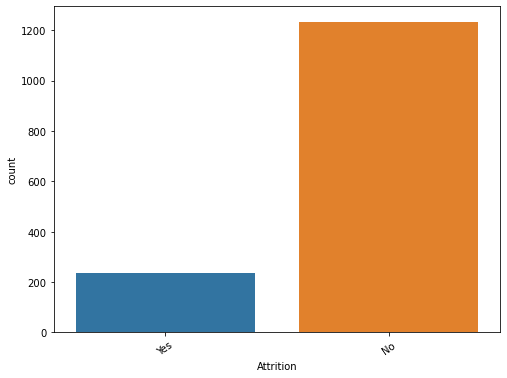



BusinessTravel:['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64


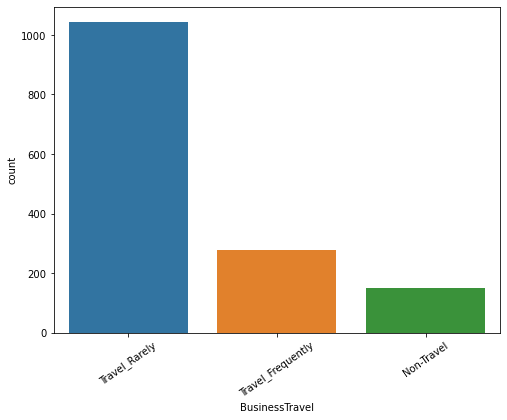



Department:['Sales' 'Research & Development' 'Human Resources']
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64


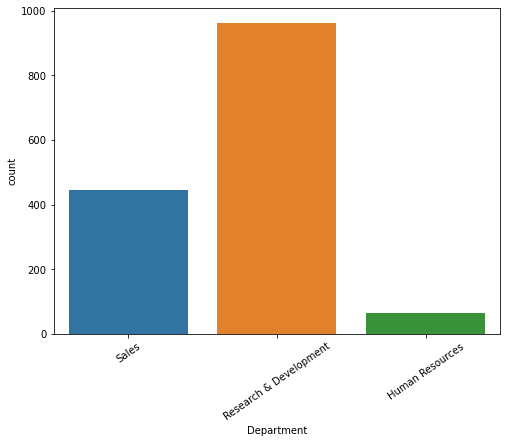



EducationField:['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64


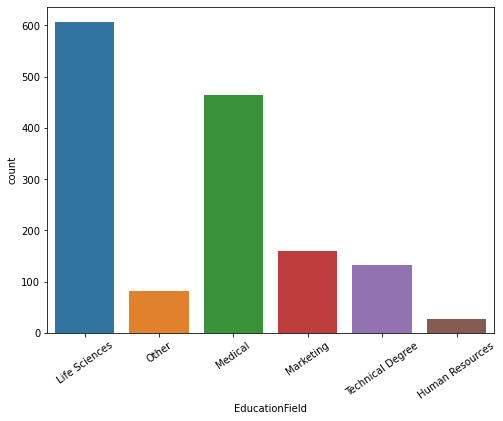



Gender:['Female' 'Male']
Male      882
Female    588
Name: Gender, dtype: int64


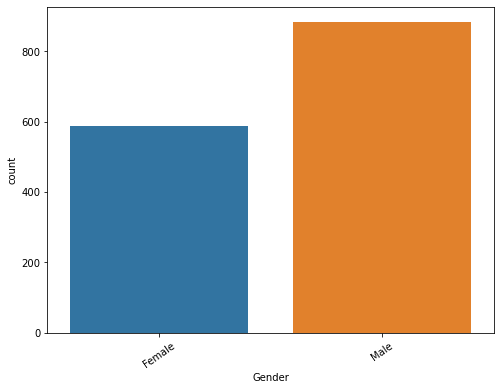



JobRole:['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64


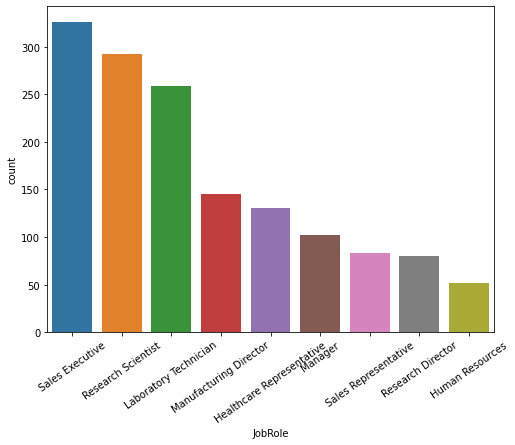



MaritalStatus:['Single' 'Married' 'Divorced']
Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64


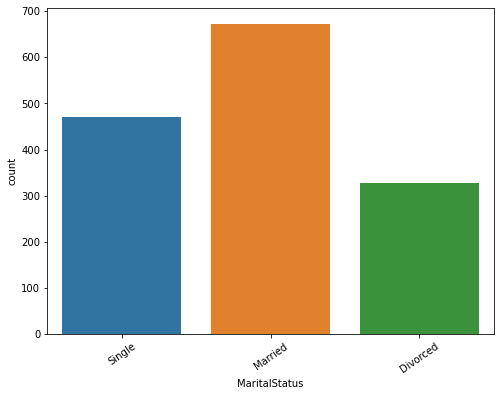



Over18:['Y']
Y    1470
Name: Over18, dtype: int64


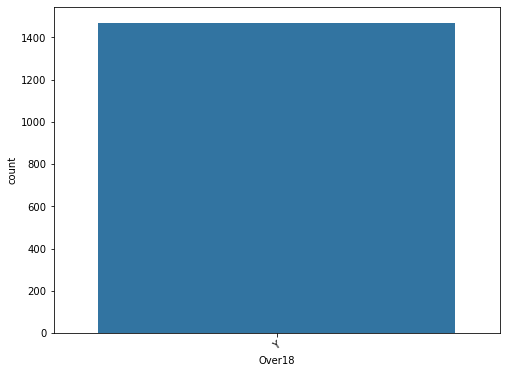



OverTime:['Yes' 'No']
No     1054
Yes     416
Name: OverTime, dtype: int64


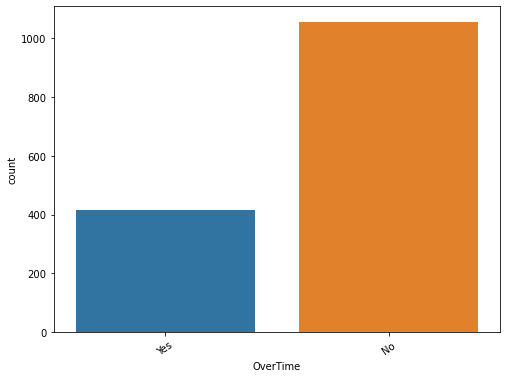

In [13]:
# distribution of object datatypes.

for column in hdf_1.columns:
    if hdf_1[column].dtype==object:
        print(str(column) + ':' + str(hdf_1[column].unique()))
        print(hdf_1[column].value_counts())
        plt.subplots(figsize=(8,6))
        sns.countplot(x=column,data = hdf_1)
        plt.xticks(rotation = 35)
        plt.show()
        print('\n')

# Bivarate Analysis

Lets check the relation of some categorical data with target Attrition

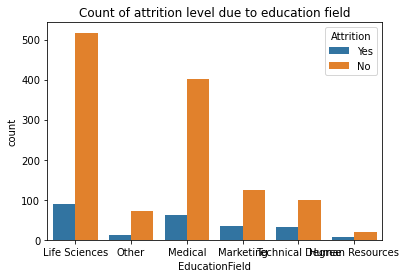

EducationField    Attrition
Human Resources   No            20
                  Yes            7
Life Sciences     No           517
                  Yes           89
Marketing         No           124
                  Yes           35
Medical           No           401
                  Yes           63
Other             No            71
                  Yes           11
Technical Degree  No           100
                  Yes           32
Name: Attrition, dtype: int64


In [14]:
sns.countplot(x='EducationField',hue = 'Attrition',data = hdf_1)
plt.title('Count of attrition level due to education field')
plt.show()
print(hdf_1.groupby('EducationField')['Attrition'].value_counts())

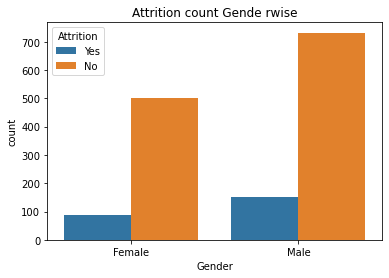

Gender  Attrition
Female  No           501
        Yes           87
Male    No           732
        Yes          150
Name: Attrition, dtype: int64


In [15]:
sns.countplot(x='Gender',hue = 'Attrition',data = hdf_1)
plt.title('Attrition count Gende rwise')
plt.show()
print(hdf_1.groupby('Gender')['Attrition'].value_counts())

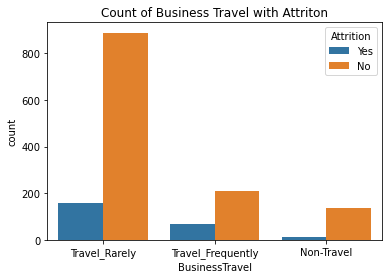

BusinessTravel     Attrition
Non-Travel         No           138
                   Yes           12
Travel_Frequently  No           208
                   Yes           69
Travel_Rarely      No           887
                   Yes          156
Name: Attrition, dtype: int64


In [16]:
sns.countplot(x='BusinessTravel',hue = 'Attrition',data = hdf_1)
plt.title('Count of Business Travel with Attriton')
plt.show()
print(hdf_1.groupby('BusinessTravel')['Attrition'].value_counts())

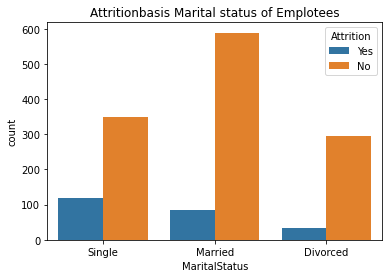

MaritalStatus  Attrition
Divorced       No           294
               Yes           33
Married        No           589
               Yes           84
Single         No           350
               Yes          120
Name: Attrition, dtype: int64


In [17]:
sns.countplot(x='MaritalStatus',hue = 'Attrition',data = hdf_1)
plt.title('Attritionbasis Marital status of Emplotees')
plt.show()
print(hdf_1.groupby('MaritalStatus')['Attrition'].value_counts())

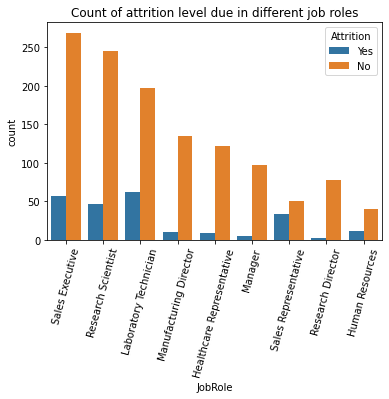

JobRole                    Attrition
Healthcare Representative  No           122
                           Yes            9
Human Resources            No            40
                           Yes           12
Laboratory Technician      No           197
                           Yes           62
Manager                    No            97
                           Yes            5
Manufacturing Director     No           135
                           Yes           10
Research Director          No            78
                           Yes            2
Research Scientist         No           245
                           Yes           47
Sales Executive            No           269
                           Yes           57
Sales Representative       No            50
                           Yes           33
Name: Attrition, dtype: int64


In [18]:
plt.title('Count of attrition level due in different job roles')
plt.xticks(rotation=75)
sns.countplot(x='JobRole',hue = 'Attrition',data = hdf_1)
plt.show()
print(hdf_1.groupby('JobRole')['Attrition'].value_counts())

The above categorical dats shows the relation with target variable.

Lets convert the object datatypes to int type.

In [19]:
for column in hdf_1.columns:
    if hdf_1[column].dtype==np.number:
        continue
    hdf_1[column]=le.fit_transform(hdf_1[column])

In [20]:
hdf_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int32
 2   BusinessTravel            1470 non-null   int32
 3   DailyRate                 1470 non-null   int64
 4   Department                1470 non-null   int32
 5   DistanceFromHome          1470 non-null   int64
 6   Education                 1470 non-null   int64
 7   EducationField            1470 non-null   int32
 8   EnvironmentSatisfaction   1470 non-null   int64
 9   Gender                    1470 non-null   int32
 10  HourlyRate                1470 non-null   int64
 11  JobInvolvement            1470 non-null   int64
 12  JobLevel                  1470 non-null   int64
 13  JobRole                   1470 non-null   int32
 14  JobSatisfaction           1470 non-null 

In [21]:
hdf_corr=hdf_1.corr()

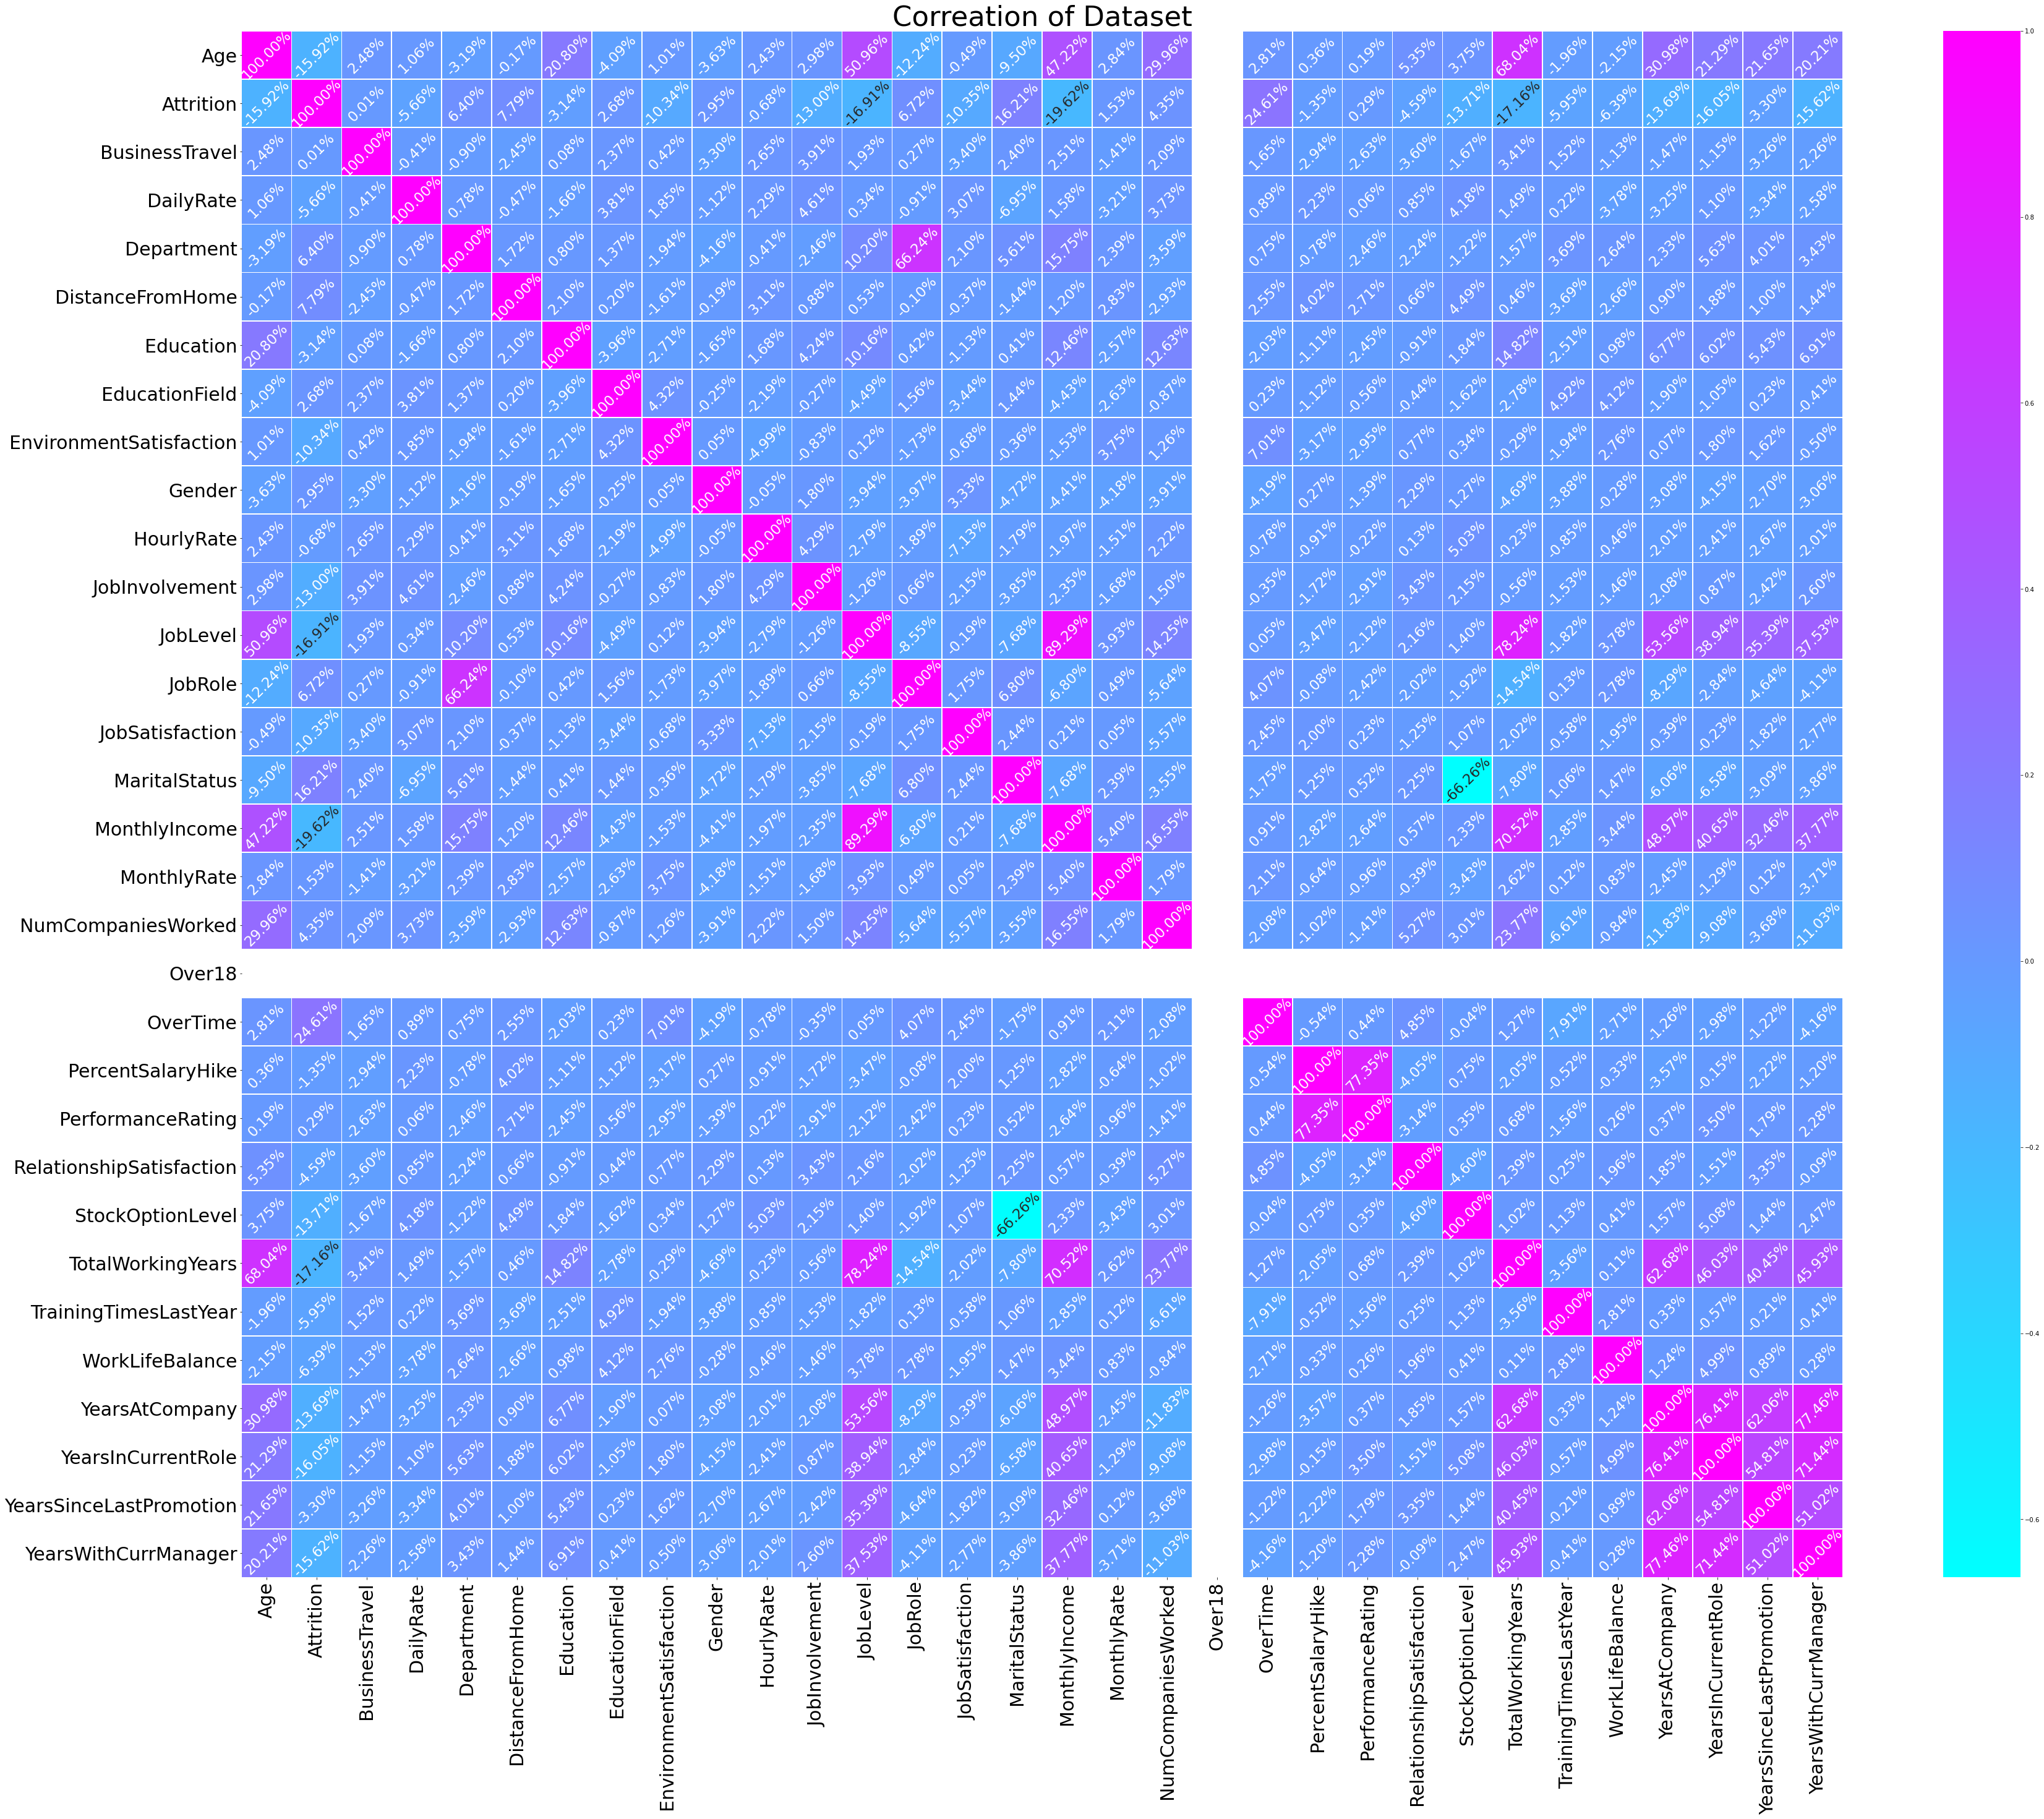

In [22]:
plt.figure(figsize = (58,46))
sns.heatmap(hdf_corr,annot = True,fmt = '.2%', annot_kws={'size':23,'rotation':45},cmap = 'cool',linewidths = .7,)
plt.title('Correation of Dataset',fontsize = 45)
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
plt.show()

OBSERVATIONS:

* Over18 has only 1 value hence have no correlaion with any points, hence is safe to remove from the dataset.
* There is high -ve correlation between Attrition & Monthly Income @ -19.62, TotalWorkingYears @ -17.16% & JobLevel @ -16.91%.
* YearsinCurrentRole has a -ve corr @ 16.05% whereas YearsWithCorrentManager has a -ve correlation of -15.62%, YearsAtCompany @ -13.69% & YearsSinceLastPromotion @ -3.30.
* Age has -ve cor @ -15.92%,StockOptionLevel has a -ve corr of -13.71%, JobInvolvement @ -13% & JobSatisfaction @ -10.35%.
* Overtime is highly +ve correlated @ 24.61% followed by MaritalStatus @ 16.21%.
* DistanceFromHome, Department & JobRole have a +ve corr @ 7.79% | 6.40% | 6.72%
* WorkLifeBalance,TrainingTimeLastYear,RelationshipSatisfaction,Monthlyrate,PercentSalaryHike,HourlyRate,Education & DailyRate are all -ve corr with range between -7% to 0. 
* businessTravel,EducationField,Gender,PerformanceRating have +ve corr between 0to4%.
* BusinessTravel @ 0.01%, PerformanceRating @ 0.29%, MonthlyRate @ 1.53%,EducationField @ 2.68,Gender @ 2.95% are least positively correlated with the target variable hence we can frop these columns.
* YearsSinceLastPromotion @ -3.30% , Education @ -3.14%, PercentSalaryHike @ -1.35% & HourlyRate @ -0.068 are least negatively correlation hence can consider dropping them too. 

**** Before dropping the columns lets check the pairplot to visualize outliers & skewness of the data.

In [23]:
hdf_remove = hdf_1[['BusinessTravel','PerformanceRating','MonthlyRate','PercentSalaryHike','HourlyRate']]

In [24]:
hdf_remove

,BusinessTravel,PerformanceRating,MonthlyRate,PercentSalaryHike,HourlyRate
0,2,0,999,0,64
1,1,1,1328,12,31
2,2,0,18,4,62
3,1,0,1228,0,26
4,2,0,846,1,10
...,...,...,...,...,...
1465,1,0,599,6,11
1466,2,0,1123,4,12
1467,2,1,175,9,57
1468,1,0,641,3,33


BusinessTravel          AxesSubplot(0.125,0.536818;0.227941x0.343182)
PerformanceRating    AxesSubplot(0.398529,0.536818;0.227941x0.343182)
MonthlyRate          AxesSubplot(0.672059,0.536818;0.227941x0.343182)
PercentSalaryHike          AxesSubplot(0.125,0.125;0.227941x0.343182)
HourlyRate              AxesSubplot(0.398529,0.125;0.227941x0.343182)
dtype: object

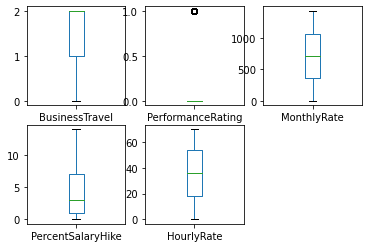

In [25]:
hdf_remove.plot(kind = 'box',subplots = True, layout=(2,3),)

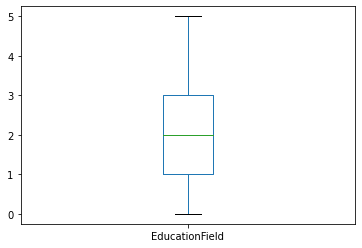

In [26]:
hdf_1['EducationField'].plot.box()

In [27]:
hdf_remove.skew()

BusinessTravel      -1.439006
PerformanceRating    1.921883
MonthlyRate          0.012315
PercentSalaryHike    0.821128
HourlyRate          -0.032311
dtype: float64

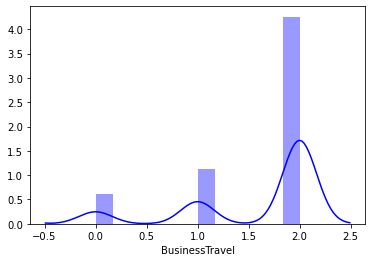

In [28]:
sns.distplot(hdf_remove['BusinessTravel'],  color = 'blue')

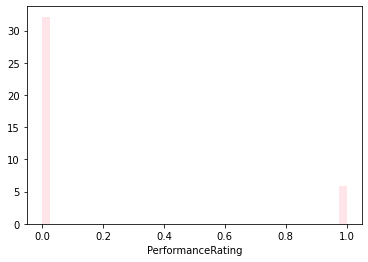

In [29]:
sns.distplot(hdf_remove['PerformanceRating'],  color = 'pink')

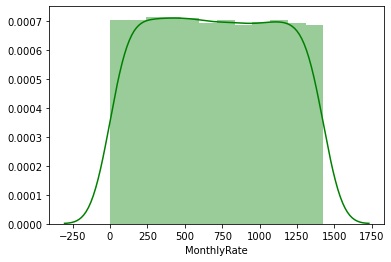

In [30]:
sns.distplot(hdf_remove['MonthlyRate'],color = 'green')

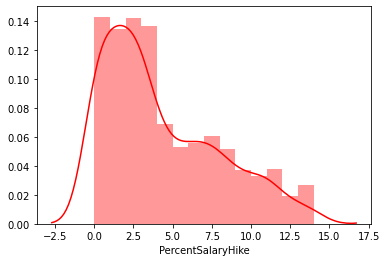

In [31]:
sns.distplot(hdf_remove['PercentSalaryHike'],color = 'red')

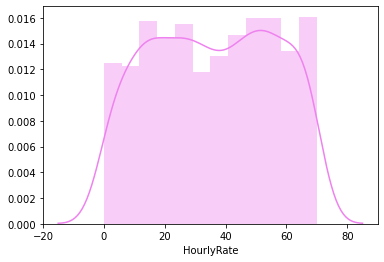

In [32]:
sns.distplot(hdf_remove['HourlyRate'],color = 'violet')

The dats that are least correlated have some outliers & skewness as can be seen above hence removing the same.

In [33]:
hdf_2 = hdf_1.drop(['BusinessTravel','PerformanceRating','MonthlyRate','PercentSalaryHike','HourlyRate','Gender',
                    'Education','Over18','YearsSinceLastPromotion','EducationField'],axis = 1)


In [34]:
hdf_2

,Age,Attrition,DailyRate,Department,DistanceFromHome,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobRole,JobSatisfaction,...,NumCompaniesWorked,OverTime,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager
0,23,1,624,2,0,1,2,1,7,3,...,8,1,0,0,8,0,0,6,4,5
1,31,0,113,1,7,2,1,1,6,1,...,1,0,3,1,10,3,2,10,7,7
2,19,1,805,1,1,3,1,0,2,2,...,6,1,1,0,7,3,2,0,0,0
3,15,0,820,1,2,3,2,0,6,2,...,1,1,2,0,8,3,2,8,7,0
4,9,0,312,1,1,0,2,0,2,1,...,9,0,3,1,6,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,18,0,494,1,22,2,3,1,2,3,...,4,0,2,1,17,3,2,5,2,3
1466,21,0,327,1,5,3,1,2,0,0,...,4,0,0,1,9,5,2,7,7,7
1467,9,0,39,1,3,1,3,1,4,1,...,1,1,1,1,6,0,2,6,2,3
1468,31,0,579,2,1,3,1,1,7,1,...,2,0,3,0,17,3,1,9,6,8


Age                             AxesSubplot(0.125,0.71587;0.110714x0.16413)
Attrition                    AxesSubplot(0.257857,0.71587;0.110714x0.16413)
DailyRate                    AxesSubplot(0.390714,0.71587;0.110714x0.16413)
Department                   AxesSubplot(0.523571,0.71587;0.110714x0.16413)
DistanceFromHome             AxesSubplot(0.656429,0.71587;0.110714x0.16413)
EnvironmentSatisfaction      AxesSubplot(0.789286,0.71587;0.110714x0.16413)
JobInvolvement                 AxesSubplot(0.125,0.518913;0.110714x0.16413)
JobLevel                    AxesSubplot(0.257857,0.518913;0.110714x0.16413)
JobRole                     AxesSubplot(0.390714,0.518913;0.110714x0.16413)
JobSatisfaction             AxesSubplot(0.523571,0.518913;0.110714x0.16413)
MaritalStatus               AxesSubplot(0.656429,0.518913;0.110714x0.16413)
MonthlyIncome               AxesSubplot(0.789286,0.518913;0.110714x0.16413)
NumCompaniesWorked             AxesSubplot(0.125,0.321957;0.110714x0.16413)
OverTime    

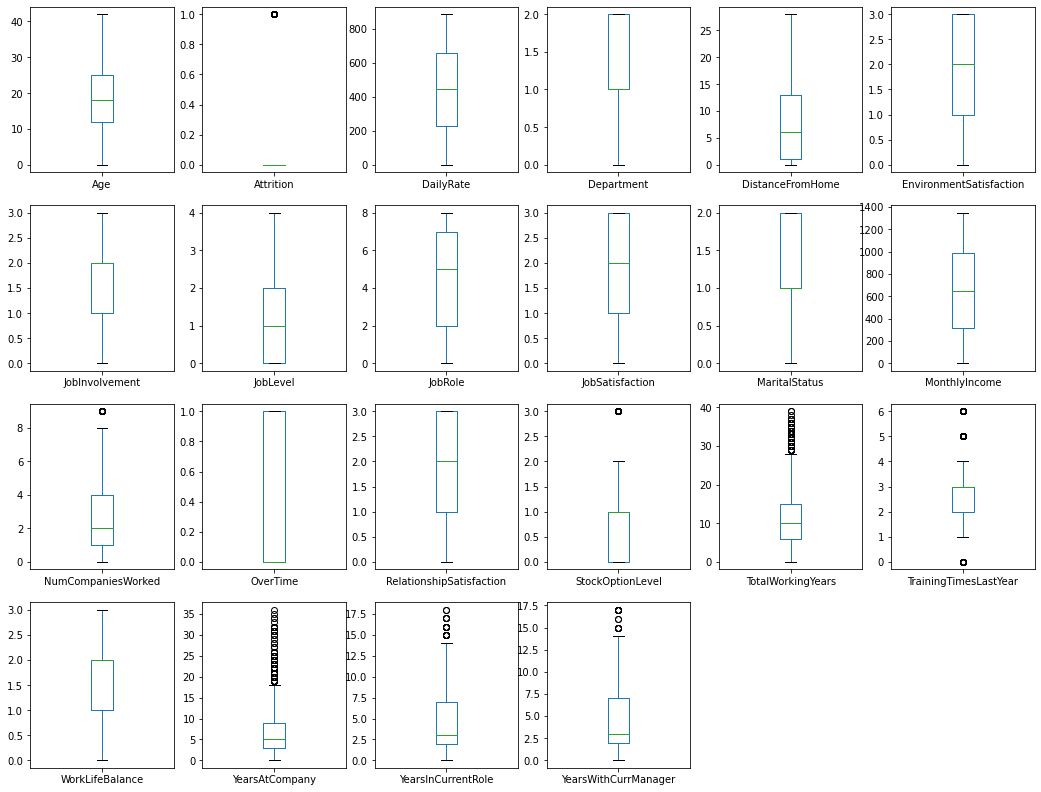

In [37]:
hdf_2.plot(kind = 'box',subplots = True ,figsize = (18,14), layout = (4,6))

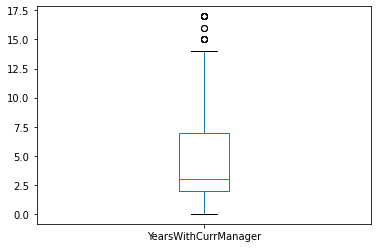

In [38]:
hdf_2['YearsWithCurrManager'].plot.box()

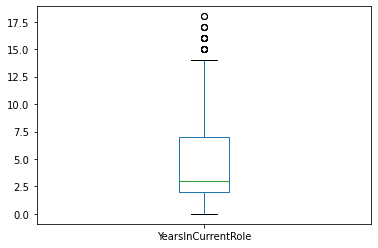

In [39]:
hdf_2['YearsInCurrentRole'].plot.box()

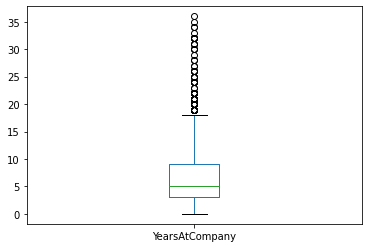

In [40]:
hdf_2['YearsAtCompany'].plot.box()

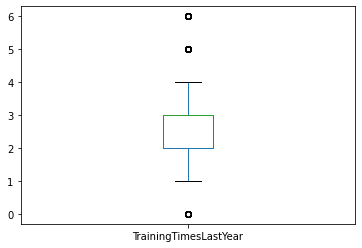

In [41]:
hdf_2['TrainingTimesLastYear'].plot.box()

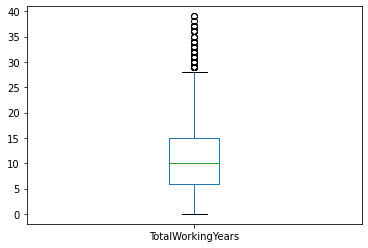

In [42]:
hdf_2['TotalWorkingYears'].plot.box()

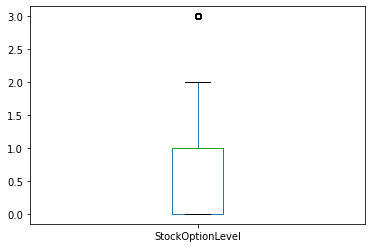

In [43]:
hdf_2['StockOptionLevel'].plot.box()

There are outliers present in the data, Lets proceed towards removal of same.

# Outliers

### Check outliers using ZSCORE Method

In [44]:
from scipy. stats import zscore
z=np.abs(zscore(hdf_2))
threshold = 3
print(np.where(z>3))

(array([  28,   62,   63,   85,   98,   98,  123,  123,  126,  126,  153,
        187,  187,  190,  190,  231,  231,  237,  270,  270,  281,  386,
        401,  411,  425,  445,  466,  473,  477,  561,  561,  592,  595,
        595,  616,  624,  635,  653,  677,  686,  716,  746,  749,  861,
        875,  894,  914,  918,  926,  956,  962,  976, 1024, 1043, 1078,
       1086, 1111, 1116, 1116, 1135, 1138, 1184, 1301, 1327, 1348, 1351,
       1401, 1430], dtype=int64), array([21, 19, 20, 16, 16, 19, 20, 21, 16, 19, 21, 16, 21, 19, 20, 20, 21,
       19, 16, 19, 20, 21, 16, 19, 19, 16, 20, 19, 19, 19, 21, 19, 16, 19,
       21, 16, 21, 19, 19, 21, 20, 20, 19, 19, 21, 16, 19, 19, 21, 16, 19,
       20, 20, 16, 21, 19, 19, 16, 19, 19, 19, 16, 16, 20, 21, 20, 16, 20],
      dtype=int64))


In [45]:
hdf_zscore=hdf_2[(z<3).all(axis=1)]
hdf_zscore.shape

(1412, 22)

Checking outliers using IQR method

In [46]:
Q1 = hdf_2.quantile(0.25)
Q3 = hdf_2.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Age                          13.00
Attrition                     0.00
DailyRate                   435.00
Department                    1.00
DistanceFromHome             12.00
EnvironmentSatisfaction       2.00
JobInvolvement                1.00
JobLevel                      2.00
JobRole                       5.00
JobSatisfaction               2.00
MaritalStatus                 1.00
MonthlyIncome               672.75
NumCompaniesWorked            3.00
OverTime                      1.00
RelationshipSatisfaction      2.00
StockOptionLevel              1.00
TotalWorkingYears             9.00
TrainingTimesLastYear         1.00
WorkLifeBalance               1.00
YearsAtCompany                6.00
YearsInCurrentRole            5.00
YearsWithCurrManager          5.00
dtype: float64


In [47]:
hdf_iqr=hdf_1[~((hdf_1 < (Q1 - 1.5 * IQR)) | (hdf_1 > (Q3 + 1.5 * IQR))).any(axis=1)]
hdf_iqr.shape

(826, 32)

PERCENTAGE LOSS OF DATA POST REMOVAL OF OUTLIERS

In [48]:
hdf_2.shape

(1470, 22)

In [49]:
percentage_loss = ((1470-1412)/1470)*100
print("% loss using zscore = ", percentage_loss)
percentage_loss1 = ((1470 - 826)/1470)*100
print("% loss of data using IQR",percentage_loss1)

% loss using zscore =  3.9455782312925165
% loss of data using IQR 43.80952380952381


Its a clear output that using zscore the % loss of data is around 4% will use that method & proceed for skewness.

In [50]:
hdf_3 = hdf_zscore
hdf_3.shape

(1412, 22)

# Skewness

In [51]:
hdf_3.skew()

Age                         0.449721
Attrition                   1.806833
DailyRate                  -0.015825
Department                  0.183220
DistanceFromHome            0.959593
EnvironmentSatisfaction    -0.327542
JobInvolvement             -0.492319
JobLevel                    1.098427
JobRole                    -0.379654
JobSatisfaction            -0.341911
MaritalStatus              -0.156517
MonthlyIncome               0.094080
NumCompaniesWorked          1.032770
OverTime                    0.962926
RelationshipSatisfaction   -0.302457
StockOptionLevel            0.962487
TotalWorkingYears           0.980264
TrainingTimesLastYear       0.570202
WorkLifeBalance            -0.551079
YearsAtCompany              1.292889
YearsInCurrentRole          0.767746
YearsWithCurrManager        0.688839
dtype: float64

In [52]:
columns = hdf_3.columns

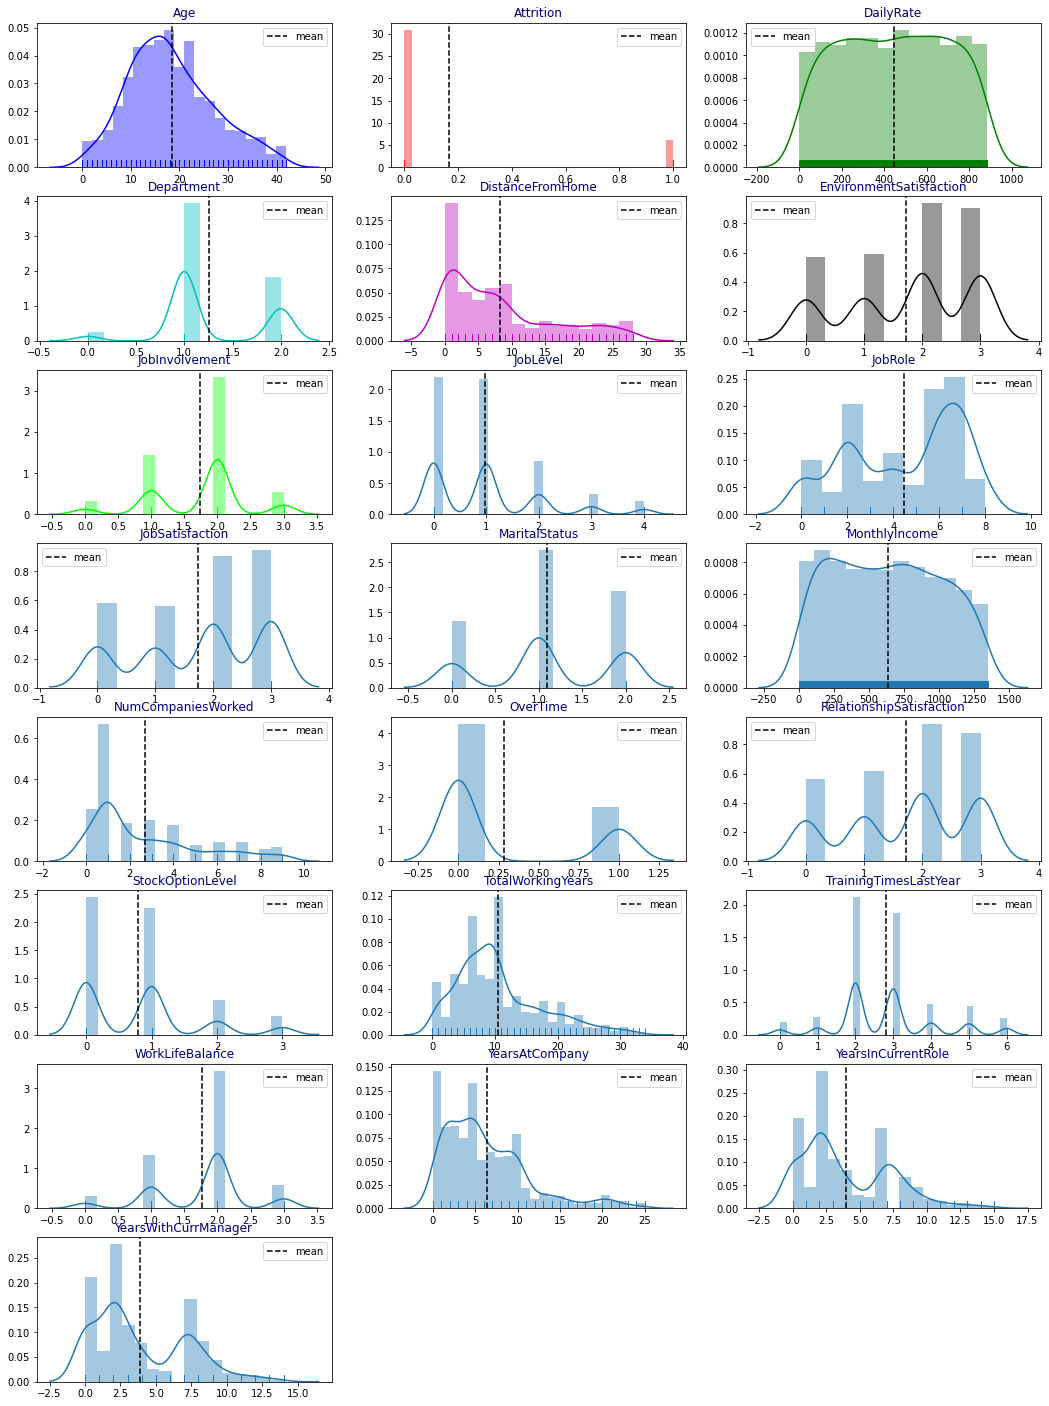

In [53]:
import itertools
cols  = (columns)
length = len(cols)
fig = plt.figure(figsize = (18,25))
cs=['b','r','g','c','m','k','lime']

for i,j,k in itertools.zip_longest(cols,range(length),cs):
    plt.subplot(8,3,j+1)
    ax = sns.distplot(hdf_3[i],color = k,rug = True)
    ax.set_facecolor('w')
    plt.axvline(hdf_3[i].mean(),linestyle = 'dashed',label='mean',color='k')
    plt.legend(loc='best')
    plt.title(i,color='navy')
    plt.xlabel("")

The data is distributed & has skewness in it as can be seen from distplot & also visible with in the skewness scores:

DistanceFromHome = 0.959593 | JobLevel=1.098427 | NumCompaniesWorked = 1.032770 | YearsAtCompany = 1.292889 |
OverTime = 0.962926 | StockOptionLevel = 0.962487 | TotalWorkingYears = 0.980264 | YearsInCurrentRole = 0.767746 |
YearsWithCurrManager = 0.688839

Splitting of data for treating skewness and machine modeling.

In [54]:
x=hdf_3.drop(['Attrition'],axis = 1)

In [55]:
y = hdf_3.iloc[:,1]

In [56]:
print(x.shape , '\t\t' , y.shape)

(1412, 21) 		 (1412,)


In [57]:
from sklearn.preprocessing import power_transform

In [58]:
x= power_transform(x,method = 'yeo-johnson')

### SCALING THE DATA

In [59]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

### train_test split & modeling of the data

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV


In [61]:
lgr = LogisticRegression()
svc = SVC()
knc = KNeighborsClassifier()
gnb = GaussianNB()
dtc = DecisionTreeClassifier()

In [62]:
max_scr=0
for i in range(73,98):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.30)
    lgr.fit(x_train,y_train)
    pred_train=lgr.predict(x_train)
    pred_test=lgr.predict(x_test)
    print('At random_state = ', i, )
    print('Training accuracy score = ', accuracy_score(y_train,pred_train))
    print('Testing accuracy score = ', accuracy_score(y_test,pred_test))

At random_state =  73
Training accuracy score =  0.9008097165991903
Testing accuracy score =  0.8443396226415094
At random_state =  74
Training accuracy score =  0.8846153846153846
Testing accuracy score =  0.8679245283018868
At random_state =  75
Training accuracy score =  0.8876518218623481
Testing accuracy score =  0.8632075471698113
At random_state =  76
Training accuracy score =  0.8785425101214575
Testing accuracy score =  0.8726415094339622
At random_state =  77
Training accuracy score =  0.8744939271255061
Testing accuracy score =  0.8726415094339622
At random_state =  78
Training accuracy score =  0.8805668016194332
Testing accuracy score =  0.8797169811320755
At random_state =  79
Training accuracy score =  0.8846153846153846
Testing accuracy score =  0.8773584905660378
At random_state =  80
Training accuracy score =  0.8896761133603239
Testing accuracy score =  0.8726415094339622
At random_state =  81
Training accuracy score =  0.8805668016194332
Testing accuracy score =  0.

The best testing score is found at random_state 92

At random_state =  92 |
Training accuracy score =  0.8734817813765182 | 
Testing accuracy score =  0.9009433962264151

In [63]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 92,test_size = .30,stratify=y)

In [64]:
model = [lgr,svc,gnb,dtc,knc]


for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm = m.predict(x_test)
    print('Accuracy score of ', m, 'is: ' )
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test, predm))
    print(classification_report(y_test,predm))
    print('\n')
    cross_val = cross_val_score(m,x,y,cv = 5)
    print('Cross Validation of ',m, 'is: ' )
    print('Mean CV of ',m, 'is: ',cross_val.mean(),'and','Std CV of ', m, 'is: ',cross_val.std())
    print('\n')
    print('\n')

Accuracy score of  LogisticRegression() is: 
0.8773584905660378
[[345   9]
 [ 43  27]]
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       354
           1       0.75      0.39      0.51        70

    accuracy                           0.88       424
   macro avg       0.82      0.68      0.72       424
weighted avg       0.87      0.88      0.86       424



Cross Validation of  LogisticRegression() is: 
Mean CV of  LogisticRegression() is:  0.8746460165902313 and Std CV of  LogisticRegression() is:  0.010654474713782083




Accuracy score of  SVC() is: 
0.8608490566037735
[[348   6]
 [ 53  17]]
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       354
           1       0.74      0.24      0.37        70

    accuracy                           0.86       424
   macro avg       0.80      0.61      0.64       424
weighted avg       0.85      0.86      0.83       424



Cross Validat

**************************************************************************************************************************
###########################################################################################################################
The best score is of LogisticRegression with 

Accuracy score of  LogisticRegression() is: 0.8773584905660378
[[345   9]
 [ 43  27]]
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       354
           1       0.75      0.39      0.51        70

    accuracy                           0.88       424
   macro avg       0.82      0.68      0.72       424
weighted avg       0.87      0.88      0.86       424



Cross Validation of  LogisticRegression() is: 
Mean CV of  LogisticRegression() is:  0.8746460165902313 and Std CV of  LogisticRegression() is:  0.010654474713782083


## Hypertuning the Data

In [65]:
parameters = {'penalty':['l1', 'l2', 'elasticnet’'], 'fit_intercept' : [True,False], 
              'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga’']}
clf = GridSearchCV(lgr,parameters,cv = 5)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'fit_intercept': True, 'penalty': 'l2', 'solver': 'newton-cg'}


In [66]:
lgr=LogisticRegression(fit_intercept= True, penalty='l2', solver='newton-cg')
lgr.fit(x_train,y_train)
lgr.score(x_train,y_train)
pred_lgr=lgr.predict(x_test)
print('Accuracy Score = ',accuracy_score(y_test,predm))
print('Confusion Matrix = ', confusion_matrix(y_test, predm))
print('Classification Report = ',classification_report(y_test,predm))
cross_val = cross_val_score(lgr,x,y,cv = 5)
print('Cross Validation of ',LogisticRegression, 'is:', cross_val)
print('Mean CV of ',lgr, 'is: ',cross_val.mean(),'and','Std CV of ', lgr, 'is: ', cross_val.std())

Accuracy Score =  0.8514150943396226
Confusion Matrix =  [[351   3]
 [ 60  10]]
Classification Report =                precision    recall  f1-score   support

           0       0.85      0.99      0.92       354
           1       0.77      0.14      0.24        70

    accuracy                           0.85       424
   macro avg       0.81      0.57      0.58       424
weighted avg       0.84      0.85      0.81       424

Cross Validation of  <class 'sklearn.linear_model._logistic.LogisticRegression'> is: [0.87985866 0.86925795 0.85815603 0.89007092 0.87588652]
Mean CV of  LogisticRegression(solver='newton-cg') is:  0.8746460165902313 and Std CV of  LogisticRegression(solver='newton-cg') is:  0.010654474713782083


The accuracy score for the model has gone down post hypertuning indicating best fitting of the model. The scores are mentioned belowe:
Accuracy Score =  0.8514150943396226
Mean CV = 0.8746460165902313 & Std deviaton of CV = 0.010654474713782083

## AUC ROC CURVE

In [67]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

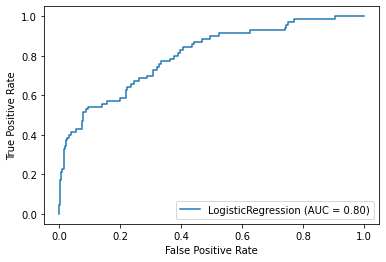

In [68]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(lgr,x_test,y_test)
plt.show()

# Serialization

In [69]:
import joblib

In [70]:
joblib.dump(lgr,'hr_analytics_dataset.pkl')

['hr_analytics_dataset.pkl']

## Conclusion

In [71]:
a=np.array(y_test)
p = np.array(lgr.predict(x_test))
print(a)
print('\n')
print(p)
df_hr_analytics=pd.DataFrame({'Original': a, 'Predicted': p }, index = range (len(a)))

[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1
 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0
 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1
 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0]


[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [72]:
df_hr_analytics

,Original,Predicted
0,0,0
1,0,0
2,0,0
3,1,0
4,0,0
...,...,...
419,0,0
420,1,0
421,0,0
422,0,0
